# 1 - Perkenalan

Nama : Naufal Indriatmoko

Batch : FTDS batch 10

Dataset: FIFA 2022

# 2 - Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 3 - Data Loading

In [3]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/danupurnomo/hacktiv8-exercises/main/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing/Players%20-%20Fifa%202022%20-%20Simplified.csv')
df

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [4]:
# copy dataset
df_copy = df.copy()

In [7]:
# rename columns
df.rename(columns={'ValueEUR': 'Price', 'Overall': 'Rating'}, inplace=True)
df

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [8]:
# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


In [10]:
# check dataset distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,19260.0,2.518468e+01,4.737340e+00,16.0,21.0,25.0,29.0,54.0
Height,19260.0,1.813050e+02,6.866151e+00,155.0,176.0,181.0,186.0,206.0
Weight,19260.0,7.495078e+01,7.066864e+00,49.0,70.0,75.0,80.0,110.0
Price,19260.0,2.857652e+06,7.604532e+06,0.0,475000.0,975000.0,2000000.0,194000000.0
PaceTotal,19260.0,6.791023e+01,1.065645e+01,28.0,62.0,68.0,75.0,97.0
ShootingTotal,19260.0,5.353551e+01,1.381348e+01,18.0,44.0,56.0,64.0,94.0
PassingTotal,19260.0,5.785332e+01,9.835494e+00,25.0,52.0,58.0,65.0,93.0
DribblingTotal,19260.0,6.302871e+01,9.704853e+00,26.0,58.0,64.0,69.0,95.0
DefendingTotal,19260.0,5.005810e+01,1.638880e+01,14.0,35.0,54.0,63.0,91.0
PhysicalityTotal,19260.0,6.467658e+01,9.626269e+00,29.0,58.0,66.0,72.0,92.0


*put narration here*

# 4 - Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Height vs Weight')

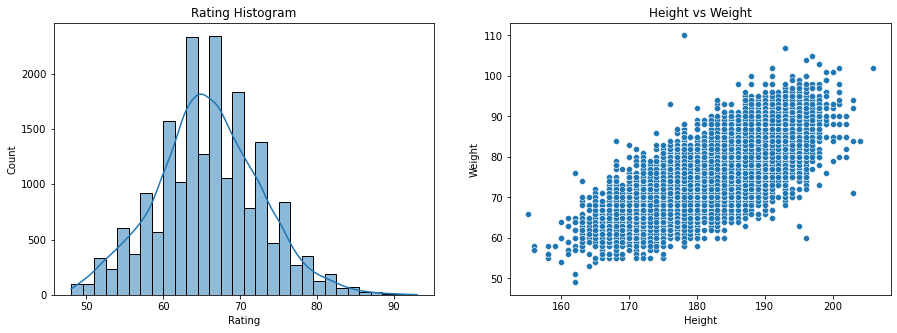

In [16]:
# create histogram and scatter plot

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Rating Histogram')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Height vs Weight')

*put narration here*

# 5 - Data Preprocessing

In [18]:
# create data inference from dataset
df_inf = df.sample(10, random_state=1) #random_state= to get same result every time
df_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
16521,Y. Omar,27,182,79,275000,Medium,Medium,75,57,46,60,24,75,59
5500,O. Lewicki,28,171,68,1200000,Medium,High,62,54,60,65,69,74,69
10699,Jorginho,25,171,61,850000,Medium,Medium,73,64,59,66,23,57,65
9768,M. Borgnino,23,176,70,1400000,Medium,Medium,83,63,60,71,31,61,66
8528,A. Derviševič,28,195,88,1000000,High,Low,59,66,73,60,54,72,67
5510,P. Köpke,25,176,75,1900000,Medium,Medium,75,69,60,70,32,62,69
13876,P. Velasco,24,180,72,750000,Medium,Medium,68,26,51,58,57,63,62
17202,R. Bettocchi,19,184,67,350000,Medium,Medium,57,56,52,60,30,57,57
4355,Jubal,27,190,80,2000000,Medium,Medium,57,29,44,54,71,73,71
11221,A. Gudiño,24,183,86,1100000,Medium,Medium,63,62,62,67,48,65,64


In [19]:
# remove inference from dataset
df_train_test = df.drop(df_inf.index)
df_train_test

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [20]:
# reset index  ---- ini opsional sebagai preventive effort for any error in the future
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

## Splitting dataset

In [21]:
# split between X and y
X = df_train_test.drop(['Rating'], axis=1)
y = df_train_test['Rating']
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19246,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19247,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19248,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


In [23]:
# split between train-set and test-set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69420) #test_size=0.2 -> 20% of data test go to test_set, the rest goes to train_set
print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)


Train size :  (15400, 13)
Test size :  (3850, 13)


## Handling Outlier

*next Tuesday*

## Handling Missing Values

next *Tuesday*

In [25]:
# check missing value on X_train
X_train.isnull().sum().sum()

0

In [26]:
# check missing value on X_test
X_test.isnull().sum().sum()

0

In [27]:
# check missing value on y_train
y_train.isnull().sum().sum()

0

In [28]:
# check missing value on y_test
y_test.isnull().sum().sum()

0

## Feature Selection

In [29]:
# display X_train
X_train.head()

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
13156,R. Trif,23,180,72,700000,High,Medium,72,45,54,57,59,62
1116,Andeson Trigo,33,175,68,5500000,High,Medium,82,63,75,77,71,64
4853,A. Jahouh,32,188,82,1100000,Medium,Medium,42,55,71,60,62,82
4922,F. Mura,22,171,74,3100000,High,Medium,81,53,59,68,66,64
12978,R. Hunt,25,171,67,475000,High,Medium,76,33,55,64,56,62


salah satu cara buat memilih kolom mana yang mau didrop bisa dengan heatmap. Drop yg korelasinya rendah.

Special in this case: karena `Name` tidak ada hubungannya dengan `Rating`, maka kolom `Name` dapat dihapus. Misal ada pemain dengan nama `Danu Ronaldo`, tidak akan ada kaitannya dengan `Cristiano Ronaldo` sehingga `Rating` kedua pemain pasti berbeda.

In [30]:
# dropping Name column
X_train.drop(['Name'], axis=1, inplace=True)
X_test.drop(['Name'], axis=1, inplace=True)
df_inf.drop(['Name'], axis=1, inplace=True)

feature selection dilakukan hanya di train set(?)

## Split between numerical and categorical columns

In [34]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns : ', num_columns)
print('Categorical columns : ', cat_columns)

Numerical columns :  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Categorical columns :  ['AttackingWorkRate', 'DefensiveWorkRate']


In [35]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## Feature Scaling

In [36]:
X_train

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
13156,23,180,72,700000,High,Medium,72,45,54,57,59,62
1116,33,175,68,5500000,High,Medium,82,63,75,77,71,64
4853,32,188,82,1100000,Medium,Medium,42,55,71,60,62,82
4922,22,171,74,3100000,High,Medium,81,53,59,68,66,64
12978,25,171,67,475000,High,Medium,76,33,55,64,56,62
...,...,...,...,...,...,...,...,...,...,...,...,...
10974,23,175,73,1100000,Medium,Medium,81,60,56,69,28,59
15022,17,187,80,775000,Medium,High,61,33,38,38,64,64
5194,30,172,65,1500000,High,Medium,87,66,59,71,42,69
7209,31,190,85,650000,Medium,Medium,68,67,64,68,49,67


In [37]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)  # proses training scaler. Scaler hanya ada di TRAINING set

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [39]:
X_train_num_scaled

array([[0.18421053, 0.48      , 0.37704918, ..., 0.44927536, 0.58441558,
        0.52380952],
       [0.44736842, 0.38      , 0.31147541, ..., 0.73913043, 0.74025974,
        0.55555556],
       [0.42105263, 0.64      , 0.54098361, ..., 0.49275362, 0.62337662,
        0.84126984],
       ...,
       [0.36842105, 0.32      , 0.26229508, ..., 0.65217391, 0.36363636,
        0.63492063],
       [0.39473684, 0.68      , 0.59016393, ..., 0.60869565, 0.45454545,
        0.6031746 ],
       [0.21052632, 0.54      , 0.39344262, ..., 0.49275362, 0.63636364,
        0.6031746 ]])

## Feature Encoding

In [42]:
X_train_cat

,AttackingWorkRate,DefensiveWorkRate
13156,High,Medium
1116,High,Medium
4853,Medium,Medium
4922,High,Medium
12978,High,Medium
...,...,...
10974,Medium,Medium
15022,Medium,High
5194,High,Medium
7209,Medium,Medium


In [41]:
# feature encoding using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_train_cat_enc

array([[0., 2.],
       [0., 2.],
       [2., 2.],
       ...,
       [0., 2.],
       [2., 2.],
       [2., 2.]])

## Concat between numerical columns and categorical columns

In [46]:
# concat columns
X_train_final = np.concatenate((X_train_num_scaled, X_train_cat_enc), axis=1)
X_test_final = np.concatenate((X_test_num_scaled, X_test_cat_enc), axis=1)
X_train_final

array([[0.18421053, 0.48      , 0.37704918, ..., 0.52380952, 0.        ,
        2.        ],
       [0.44736842, 0.38      , 0.31147541, ..., 0.55555556, 0.        ,
        2.        ],
       [0.42105263, 0.64      , 0.54098361, ..., 0.84126984, 2.        ,
        2.        ],
       ...,
       [0.36842105, 0.32      , 0.26229508, ..., 0.63492063, 0.        ,
        2.        ],
       [0.39473684, 0.68      , 0.59016393, ..., 0.6031746 , 2.        ,
        2.        ],
       [0.21052632, 0.54      , 0.39344262, ..., 0.6031746 , 2.        ,
        2.        ]])

In [44]:
# display as dataframe (optional)
X_train_final_df = pd.DataFrame(X_train_final, columns=num_columns + cat_columns)
X_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.184211,0.48,0.377049,0.003608,0.637681,0.355263,0.426471,0.449275,0.584416,0.523810,0.0,2.0
1,0.447368,0.38,0.311475,0.028351,0.782609,0.592105,0.735294,0.739130,0.740260,0.555556,0.0,2.0
2,0.421053,0.64,0.540984,0.005670,0.202899,0.486842,0.676471,0.492754,0.623377,0.841270,2.0,2.0
3,0.157895,0.30,0.409836,0.015979,0.768116,0.460526,0.500000,0.608696,0.675325,0.555556,0.0,2.0
4,0.236842,0.30,0.295082,0.002448,0.695652,0.197368,0.441176,0.550725,0.545455,0.523810,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0.184211,0.38,0.393443,0.005670,0.768116,0.552632,0.455882,0.623188,0.181818,0.476190,2.0,2.0
15396,0.026316,0.62,0.508197,0.003995,0.478261,0.197368,0.191176,0.173913,0.649351,0.555556,2.0,0.0
15397,0.368421,0.32,0.262295,0.007732,0.855072,0.631579,0.500000,0.652174,0.363636,0.634921,0.0,2.0
15398,0.394737,0.68,0.590164,0.003351,0.579710,0.644737,0.573529,0.608696,0.454545,0.603175,2.0,2.0


# 6 - Model Definition

In [47]:
# train using linear regression
from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

Metric yang dipakai dalam kasus ini adalah MAE (Mean Absolute Error)

# 7 - Model Training

In [48]:
# Train the model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# 8 - Model Evaluation

In [50]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

In [51]:
from sklearn.metrics import mean_absolute_error

print('MAE train : ', mean_absolute_error(y_train, y_pred_train))
print('MAE test : ', mean_absolute_error(y_test, y_pred_test))

MAE train :  2.359366754360027
MAE test :  2.359398394770368


# 9 - Model Inference

In [52]:
df_inf

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,27,182,79,275000,Medium,Medium,75,57,46,60,24,75,59
1,28,171,68,1200000,Medium,High,62,54,60,65,69,74,69
2,25,171,61,850000,Medium,Medium,73,64,59,66,23,57,65
3,23,176,70,1400000,Medium,Medium,83,63,60,71,31,61,66
4,28,195,88,1000000,High,Low,59,66,73,60,54,72,67
5,25,176,75,1900000,Medium,Medium,75,69,60,70,32,62,69
6,24,180,72,750000,Medium,Medium,68,26,51,58,57,63,62
7,19,184,67,350000,Medium,Medium,57,56,52,60,30,57,57
8,27,190,80,2000000,Medium,Medium,57,29,44,54,71,73,71
9,24,183,86,1100000,Medium,Medium,63,62,62,67,48,65,64


In [53]:
# split into numerical and categorical columns
df_inf_num = df_inf[num_columns]
df_inf_cat = df_inf[cat_columns]

In [54]:
# Feature scaling and feature encoding

df_inf_num_scaled = scaler.transform(df_inf_num)
df_inf_cat_enc = encoder.transform(df_inf_cat)

In [55]:
# merge numerical and categorical columns
df_inf_final = np.concatenate((df_inf_num_scaled, df_inf_cat_enc), axis=1)
df_inf_final_df = pd.DataFrame(df_inf_final, columns=num_columns + cat_columns)
df_inf_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.289474,0.52,0.491803,0.001418,0.681159,0.513158,0.308824,0.492754,0.129870,0.730159,2.0,2.0
1,0.315789,0.30,0.311475,0.006186,0.492754,0.473684,0.514706,0.565217,0.714286,0.714286,2.0,0.0
2,0.236842,0.30,0.196721,0.004381,0.652174,0.605263,0.500000,0.579710,0.116883,0.444444,2.0,2.0
3,0.184211,0.40,0.344262,0.007216,0.797101,0.592105,0.514706,0.652174,0.220779,0.507937,2.0,2.0
4,0.315789,0.78,0.639344,0.005155,0.449275,0.631579,0.705882,0.492754,0.519481,0.682540,0.0,1.0
5,0.236842,0.40,0.426230,0.009794,0.681159,0.671053,0.514706,0.637681,0.233766,0.523810,2.0,2.0
6,0.210526,0.48,0.377049,0.003866,0.579710,0.105263,0.382353,0.463768,0.558442,0.539683,2.0,2.0
7,0.078947,0.56,0.295082,0.001804,0.420290,0.500000,0.397059,0.492754,0.207792,0.444444,2.0,2.0
8,0.289474,0.68,0.508197,0.010309,0.420290,0.144737,0.279412,0.405797,0.740260,0.698413,2.0,2.0
9,0.210526,0.54,0.606557,0.005670,0.507246,0.578947,0.544118,0.594203,0.441558,0.571429,2.0,2.0


In [56]:
# Predict Inference-Set

y_pred_inf = model_lin_reg.predict(df_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Rating - Prediction'])
y_pred_inf_df

,Rating - Prediction
0,63.917777
1,69.725168
2,61.763317
3,65.379266
4,68.853846
5,65.893295
6,62.473253
7,58.866816
8,65.426894
9,66.757768


In [57]:
# concat inference set with prediction
pd.concat([df_inf_final_df, y_pred_inf_df], axis=1)

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate,Rating - Prediction
0,0.289474,0.52,0.491803,0.001418,0.681159,0.513158,0.308824,0.492754,0.129870,0.730159,2.0,2.0,63.917777
1,0.315789,0.30,0.311475,0.006186,0.492754,0.473684,0.514706,0.565217,0.714286,0.714286,2.0,0.0,69.725168
2,0.236842,0.30,0.196721,0.004381,0.652174,0.605263,0.500000,0.579710,0.116883,0.444444,2.0,2.0,61.763317
3,0.184211,0.40,0.344262,0.007216,0.797101,0.592105,0.514706,0.652174,0.220779,0.507937,2.0,2.0,65.379266
4,0.315789,0.78,0.639344,0.005155,0.449275,0.631579,0.705882,0.492754,0.519481,0.682540,0.0,1.0,68.853846
5,0.236842,0.40,0.426230,0.009794,0.681159,0.671053,0.514706,0.637681,0.233766,0.523810,2.0,2.0,65.893295
6,0.210526,0.48,0.377049,0.003866,0.579710,0.105263,0.382353,0.463768,0.558442,0.539683,2.0,2.0,62.473253
7,0.078947,0.56,0.295082,0.001804,0.420290,0.500000,0.397059,0.492754,0.207792,0.444444,2.0,2.0,58.866816
8,0.289474,0.68,0.508197,0.010309,0.420290,0.144737,0.279412,0.405797,0.740260,0.698413,2.0,2.0,65.426894
9,0.210526,0.54,0.606557,0.005670,0.507246,0.578947,0.544118,0.594203,0.441558,0.571429,2.0,2.0,66.757768


# 10 - Pengambilan Kesimpulan

In [60]:
# find intercept and Slope
intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  36.37690063871132
Slope :  [ 7.59584958  2.15975988  1.49603888 38.8322599   2.66085357  2.69480553
  2.90523248 20.86821214  7.79466672 11.8757163  -0.16642535 -0.14890945]
